In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [4]:
# error fix from here: https://bitbucket.org/zzzeek/sqlalchemy/issues/3449/automap_base-fails-on-my-database

def name_for_scalar_relationship(base, local_cls, referred_cls, constraint):
    name = referred_cls.__name__.lower() + "_ref"
    return name

Base.prepare(
    engine, reflect=True,
    name_for_scalar_relationship=name_for_scalar_relationship
)




In [5]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [6]:
 # Assign the classes to variables
Stations = Base.classes.station
Measurements = Base.classes.measurement


In [7]:
# Create a session

session = Session(engine)

In [8]:
for row in session.query(Measurements, Measurements.date).limit(5).all():
    print(row)

(<sqlalchemy.ext.automap.measurement object at 0x00000290599F0C88>, '2010-01-01')
(<sqlalchemy.ext.automap.measurement object at 0x00000290599F0CF8>, '2010-01-02')
(<sqlalchemy.ext.automap.measurement object at 0x00000290599F0D68>, '2010-01-03')
(<sqlalchemy.ext.automap.measurement object at 0x00000290599F0DD8>, '2010-01-04')
(<sqlalchemy.ext.automap.measurement object at 0x00000290599F0E48>, '2010-01-07')


<h2>Preciptation Analysis</h2>

In [9]:
#Design a query to retrieve the last 12 months of precipitation data.
prcps_12_months = session.query(Measurements.date, Measurements.prcp).\
        filter(Measurements.date >= '2016-08-24').filter(Measurements.date <= '2017-04-23').order_by(Measurements.date).all()

In [10]:
precipitation_df = pd.DataFrame(prcps_12_months)
precipitation_df

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,1.22
4,2016-08-24,2.15
5,2016-08-24,1.45
6,2016-08-25,0.08
7,2016-08-25,0.08
8,2016-08-25,0.00
9,2016-08-25,0.00


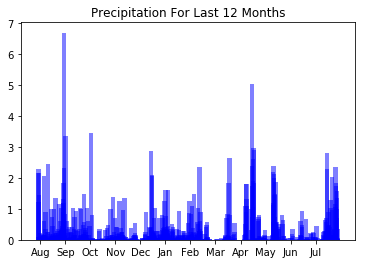

In [11]:
# Define labels
plt.title("Precipitation For Last 12 Months")

# Define months for x-ticks labels
months = ["Aug", "Sep", "Oct", "Nov", "Dec", "Jan", "Feb", "Mar", "Apr","May", "Jun", "Jul", "Aug"]

# Define X and Y values
x_axis = np.arange(0, len(precipitation_df))
y_axis = precipitation_df["prcp"]

# Define X-tick labels (months) and their positioning
total_entries = len(precipitation_df["prcp"].tolist())
month_ticks = int(total_entries / 12)
tick_locations = [x+20 for x in range(1, total_entries, month_ticks)]

# Define plot
plt.bar(x_axis, y_axis, width=20, color="blue", alpha=0.5, align="edge")
plt.xticks(tick_locations, months)

plt.style.use('ggplot')

plt.show()

<h2>Station Analysis</h2>

In [14]:
# query to find the most active stations
# find this by counting the frequency each station appears
# order by descending so most active to least active
most_active_stations = session.query(Measurements.station, func.count(Measurements.station)).\
    group_by(Measurements.station).order_by(func.count(Measurements.station).desc()).all()

# Set above query results to dataframe
most_active_df= pd.DataFrame(most_active_stations, columns=['station', 'count'])

most_active_df

,station,count
0,USC00519281,2772
1,USC00513117,2696
2,USC00519397,2685
3,USC00519523,2572
4,USC00516128,2484
5,USC00514830,1937
6,USC00511918,1932
7,USC00517948,683
8,USC00518838,342


In [17]:
#Which station has the highest number of observations?

most_observations_station = most_active_df["station"][0]
most_observations_count = most_active_df["count"][0]

#Design a query to retrieve the last 12 months of temperature observation data (tobs).
temperature_12_months = session.query(Measurements.tobs).\
    filter(Measurements.date >= '2016-08-24').\
    filter(Measurements.station == most_observations_station).\
    order_by(Measurements.tobs).all()

temperature_12_months

[(59.0),
 (59.0),
 (59.0),
 (60.0),
 (60.0),
 (61.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (63.0),
 (63.0),
 (63.0),
 (63.0),
 (64.0),
 (64.0),
 (64.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (66.0),
 (66.0),
 (66.0),
 (66.0),
 (66.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 

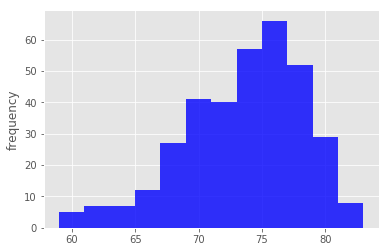

In [29]:
#Filter by the station with the highest number of observations.
#Plot the results as a histogram with bins=12.# Set station with highest number of observations to a variable

fig = plt.figure()
ax = fig.add_subplot(111)

x = np.array(temperature_12_months)
numBins = 12
ax.hist(x,numBins,color='blue',alpha=0.8)

plt.ylabel('frequency')

plt.show()

<h2>Temperature Analysis</h2>

In [32]:
#Write a function called calc_temps that will accept a start date and end date 
#in the format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates.

def calc_temps(start_date, end_date):

    return session.query(func.min(Measurements.tobs), func.avg(Measurements.tobs), func.max(Measurements.tobs)).\
        filter(Measurements.date >= start_date).filter(Measurements.date <= end_date).all()
    

In [41]:
#Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using 
#the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

start_date = '2016-03-20'
end_date = '2016-03-29'

# Call function to return average temperatures for this date range
trip_temps = calc_temps(start_date, end_date)
trip_temps

[(63.0, 71.21428571428571, 77.0)]

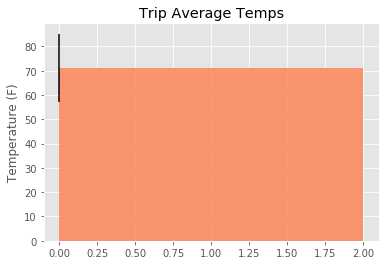

In [58]:
#Plot the min, avg, and max temperature from your previous query as a bar chart.

#Use the average temperature as the bar height.
x_axis = 0
y_axis = [trip_temps[0][1]]

#Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).
yerr = trip_temps[0][2] - trip_temps[0][0]

plt.title("Trip Average Temps")
plt.ylabel("Temperature (F)")

plt.bar(x_axis, y_axis, width=2, color="coral", alpha=0.8, align="edge")
plt.errorbar(x_axis, y_axis, yerr=yerr, ecolor="black") #I can't get it to show in the center?

plt.show()